In [159]:
import pandas as pd
from datetime import datetime
#import xlrd
df1=pd.read_excel('燃油价格2108-2308.xlsx', usecols=[3,7], skiprows=1)
df1['日期']= pd.to_datetime(df1['日期']).dt.strftime('%Y-%m-%d')
df1=df1.dropna()
#print(df1)
df2=pd.read_excel('低硫上期所.xlsx', usecols=[2,0])
df2['日期']= pd.to_datetime(df2['日期']).dt.strftime('%Y-%m-%d')
#print(df2)

df3=pd.read_excel('人民币汇率中间价2021-2022.xls', usecols=[0,1])
df3['日期']= pd.to_datetime(df3['日期']).dt.strftime('%Y-%m-%d')
df4=pd.read_excel('人民币汇率中间价2022-2023.xls', usecols=[0,1])
df4['日期']= pd.to_datetime(df4['日期']).dt.strftime('%Y-%m-%d')
#print(df3,df4)
df_rate=pd.merge(df3, df4, how='outer', sort= True)    #合并2021-2023年美元汇率数据

data=pd.merge(df1, df_rate, how='inner',on='日期')    #合并汇率数据与现货价格数据
rate_data=data[['日期', 'VLSFO(S<0.5%)', '美元']]
rate_data['goods_cny']=rate_data['VLSFO(S<0.5%)']*rate_data['美元']*0.01    #计算人民币现货价格
rate_data['goods_cny']=rate_data['goods_cny'].astype(int)    #对价格取整，方便计算
#print(rate_data)

data1=pd.merge(df2,rate_data, how='inner',on='日期')
futures_data=data1[['日期', 'LU活跃合约收盘价 元/吨']]
futures_data.set_index('日期', inplace=True)
goods_data=data1[['日期', 'goods_cny']]
goods_data.set_index('日期', inplace=True)
#print(futures_data, goods_data)



/var/folders/qx/tb7pp8_n4v7b2754h7_mn3yr0000gn/T/ipykernel_15080/4081745236.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_data['goods_cny']=rate_data['VLSFO(S<0.5%)']*rate_data['美元']*0.01    #计算人民币现货价格
/var/folders/qx/tb7pp8_n4v7b2754h7_mn3yr0000gn/T/ipykernel_15080/4081745236.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_data['goods_cny']=rate_data['goods_cny'].astype(int)    #对价格取整，方便计算


In [2]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 583 kB/s eta 0:00:01
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0
Note: you may need to restart the kernel to use updated packages.


In [160]:
print(goods_data.describe())

         goods_cny
count   477.000000
mean   4645.517820
std    1009.012479
min    3171.000000
25%    3959.000000
50%    4280.000000
75%    5089.000000
max    7602.000000


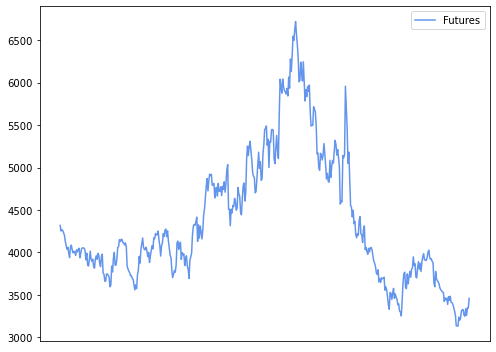

ADF Statistic of Futures: -1.083315
p-value: 0.721680
Lags Used: 6.000000
Number of Observations Used: 470.000000
1%: -3.444
5%: -2.868
10%: -2.570
ADF Statistic of Log Diff Futures: -10.707019
p-value: 0.000000
Lags Used: 5.000000
Number of Observations Used: 470.000000
1%: -3.444
5%: -2.868
10%: -2.570


/Users/pakyuchan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/qx/tb7pp8_n4v7b2754h7_mn3yr0000gn/T/ipykernel_15080/3738935334.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  futures_data['log_futures']=np.log((futures_data['LU活跃合约收盘价 元/吨']) / futures_data['LU活跃合约收盘价 元/吨'].shift(1)).dropna()


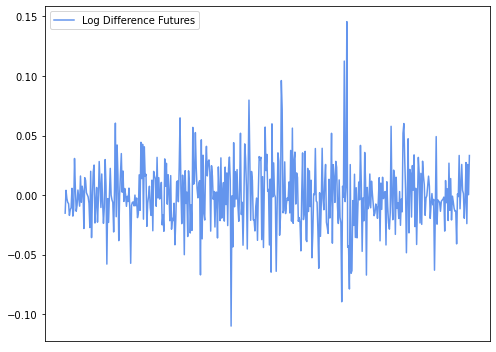

In [157]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller as ADF
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(futures_data['LU活跃合约收盘价 元/吨'], color='cornflowerblue', label='Futures')
plt.legend(loc='best')
plt.gca().xaxis.set_visible(False)
plt.tight_layout()
plt.show()

#futures_int=futures_data['LU活跃合约收盘价 元/吨']
adf_futures=ADF(futures_data['LU活跃合约收盘价 元/吨'])

print('ADF Statistic of Futures: %f' % adf_futures[0])
print('p-value: %f' % adf_futures[1])
print('Lags Used: %f' % adf_futures[2])
print('Number of Observations Used: %f' % adf_futures[3])
for key, value in adf_futures[4].items():
    print('%s: %.3f' % (key, value))
    
#log_futures=np.log(futures_int)
#diff_futures=log_futures.diff().dropna()
#adf_diff_futures=ADF(diff_futures.dropna())

futures_data['log_futures']=np.log((futures_data['LU活跃合约收盘价 元/吨']) / futures_data['LU活跃合约收盘价 元/吨'].shift(1)).dropna()
adf_diff_futures=ADF(futures_data['log_futures'].dropna())

print('ADF Statistic of Log Diff Futures: %f' % adf_diff_futures[0])
print('p-value: %f' % adf_diff_futures[1])
print('Lags Used: %f' % adf_diff_futures[2])
print('Number of Observations Used: %f' % adf_diff_futures[3])
for key, value in adf_diff_futures[4].items():
    print('%s: %.3f' % (key, value))
    
plt.figure(figsize=(7,5))

plt.plot(futures_data['log_futures'], color='cornflowerblue', label='Log Difference Futures')
plt.legend(loc='best')
plt.gca().xaxis.set_visible(False)
plt.tight_layout()
plt.show()

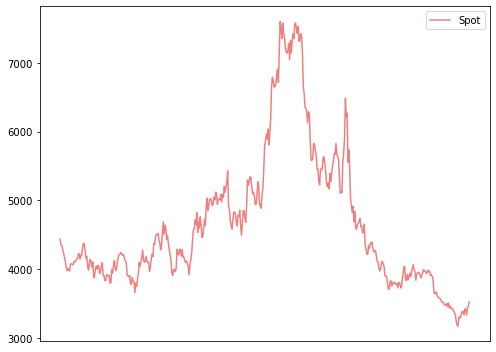

ADF Statistic of Spot: -1.356082
p-value: 0.603140
Lags Used: 9.000000
Number of Observations Used: 467.000000
1%: -3.444
5%: -2.868
10%: -2.570
ADF Statistic of Log Diff Spot: -13.992712
p-value: 0.000000
Lags Used: 1.000000
Number of Observations Used: 474.000000
1%: -3.444
5%: -2.868
10%: -2.570


/Users/pakyuchan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/qx/tb7pp8_n4v7b2754h7_mn3yr0000gn/T/ipykernel_15080/3513744737.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goods_data['log_goods']=np.log((goods_data['goods_cny']) / goods_data['goods_cny'].shift(1)).dropna()


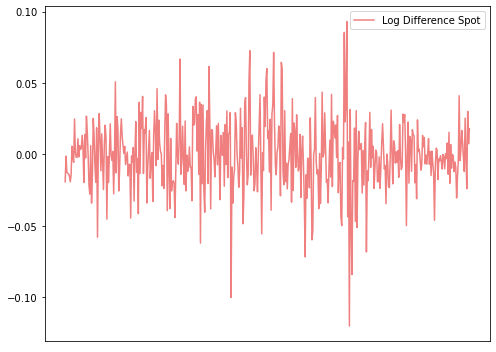

In [158]:
plt.figure(figsize=(7,5))
plt.plot(goods_data['goods_cny'], color='lightcoral', label='Spot')
plt.legend(loc='best')
plt.gca().xaxis.set_visible(False)
plt.tight_layout()
plt.show()

#goods_int=goods_data['goods_cny']
adf_goods=ADF(goods_data['goods_cny'])

print('ADF Statistic of Spot: %f' % adf_goods[0])
print('p-value: %f' % adf_goods[1])
print('Lags Used: %f' % adf_goods[2])
print('Number of Observations Used: %f' % adf_goods[3])
for key, value in adf_goods[4].items():
    print('%s: %.3f' % (key, value))
    
#log_goods=np.log(goods_int)
#diff_goods=log_goods.diff().dropna()
#adf_diff_goods=ADF(diff_goods.dropna())


goods_data['log_goods']=np.log((goods_data['goods_cny']) / goods_data['goods_cny'].shift(1)).dropna()
adf_diff_goods=ADF(goods_data['log_goods'].dropna())
#print(goods_data['log_goods'].dropna())
print('ADF Statistic of Log Diff Spot: %f' % adf_diff_goods[0])
print('p-value: %f' % adf_diff_goods[1])
print('Lags Used: %f' % adf_diff_goods[2])
print('Number of Observations Used: %f' % adf_diff_goods[3])
for key, value in adf_diff_goods[4].items():
    print('%s: %.3f' % (key, value))
    
plt.figure(figsize=(7,5))

plt.plot(goods_data['log_goods'], color='lightcoral', label='Log Difference Spot')
plt.legend(loc='best')
plt.gca().xaxis.set_visible(False)
plt.tight_layout()
plt.show()

In [129]:
#pearson相关系数：范围-1到1，越接近1表示强正相关，接近-1表示强负相关，接近0表示无线性相关性
from scipy.stats import pearsonr
corr, p_value=pearsonr(futures_data['log_futures'].dropna(), goods_data['log_goods'].dropna())
print(f'Pearson correlation coefficient: {corr}')
print(f'p-value: {p_value}')

Pearson correlation coefficient: 0.7954212931453161
p-value: 3.750146885027714e-105


In [130]:
returns_data=pd.merge(futures_data['log_futures'], goods_data['log_goods'], left_index=True, right_index=True).dropna()

print(returns_data)

X=returns_data['log_goods']
Y=returns_data['log_futures']

X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

hedge_ratio=model.params['log_goods']
print(f'Suggested hedge ratio: {hedge_ratio}')

            log_futures  log_goods
日期                                
2023-07-31    -0.015168  -0.019131
2023-07-28     0.003989  -0.001150
2023-07-27    -0.002814  -0.012509
2023-07-26    -0.006125  -0.013140
2023-07-25    -0.007114  -0.013554
...                 ...        ...
2021-08-06     0.027316  -0.003219
2021-08-05    -0.023937  -0.024026
2021-08-04     0.025732   0.030162
2021-08-03     0.000299   0.007545
2021-08-02     0.033204   0.018049

[476 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:            log_futures   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     816.5
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          3.75e-105
Time:                        16:42:52   Log-Likelihood:                 1276.2
No. Observations:                 476   AIC:   

/var/folders/qx/tb7pp8_n4v7b2754h7_mn3yr0000gn/T/ipykernel_15080/922125595.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spore_date=bar_data[(vlsfo_orders['港口'] == 'SINGAPORE')]


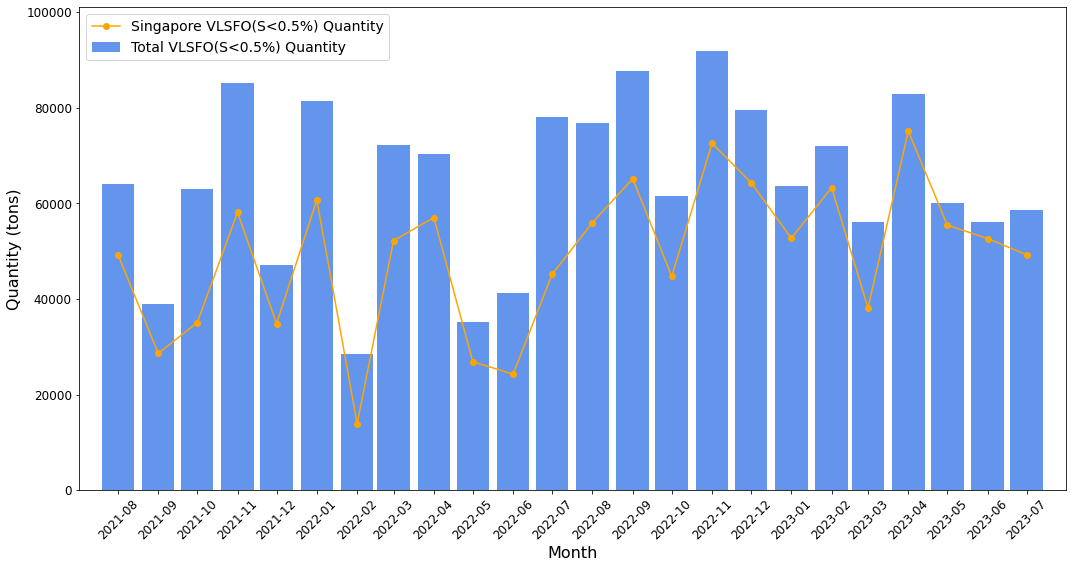

/var/folders/qx/tb7pp8_n4v7b2754h7_mn3yr0000gn/T/ipykernel_15080/922125595.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spore_goods=bar_data[(bar_data['采购方式'] == '现货') & (vlsfo_orders['港口'] == 'SINGAPORE')]
/var/folders/qx/tb7pp8_n4v7b2754h7_mn3yr0000gn/T/ipykernel_15080/922125595.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spore_goods['价格区间']=pd.cut(spore_goods['订单价(元/吨)'], bins=range(int(spore_goods['订单价(元/吨)'].min()), int(spore_goods['订单价(元/吨)'].max()) + 30, 30))


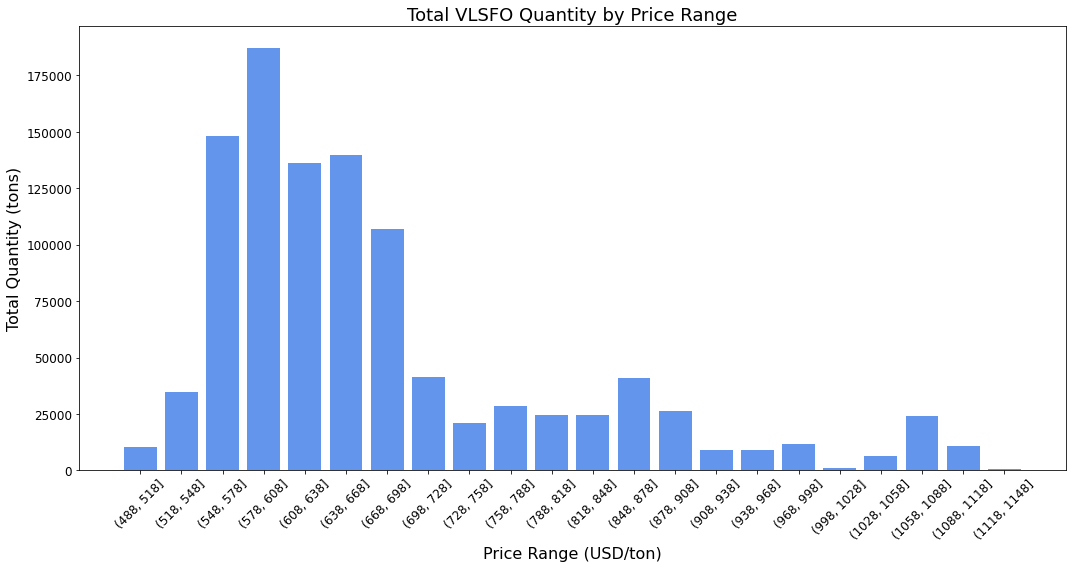

In [167]:
import matplotlib.dates as mdates

orders=pd.read_excel('外贸船舶燃油补给汇总21-24.xlsx')
duplicates=orders[orders.duplicated()]
#print(duplicates)

orders['安排日期']=pd.to_datetime(orders['安排日期'], errors='coerce')
vlsfo_orders=orders[orders['品名'] == 'VLSFO(S<0.5%)']

bar_data=vlsfo_orders[(vlsfo_orders['安排日期'] >= '2021-08-01') & (vlsfo_orders['安排日期'] < '2023-08-01')]
bar_data1=bar_data.groupby(bar_data['安排日期'].dt.to_period('M'))['数量(吨)'].sum().reset_index()    #按月统计
bar_data1['安排日期']=bar_data1['安排日期'].dt.to_timestamp()
#print(bar_data)

spore_date=bar_data[(vlsfo_orders['港口'] == 'SINGAPORE')]
spore_data=spore_data.groupby(spore_data['安排日期'].dt.to_period('M'))['数量(吨)'].sum().reset_index()
spore_data['安排日期']=spore_data['安排日期'].dt.to_timestamp()

#print(vlsfo_orders.head())
#print(spore_data)

plt.figure(figsize=(15, 8))
plt.bar(bar_data1['安排日期'], bar_data1['数量(吨)'], color='cornflowerblue', width=25, label='Total VLSFO(S<0.5%) Quantity')
plt.plot(spore_data['安排日期'], spore_data['数量(吨)'], color='orange', marker='o', label='Singapore VLSFO(S<0.5%) Quantity')

total_max = max(bar_data1['数量(吨)'].max(), spore_data['数量(吨)'].max())    #设置统一的Y轴
plt.ylim(0, total_max * 1.1)    #增加10%的上限空间

plt.xlabel('Month', fontsize=16)
plt.ylabel('Quantity (tons)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=14) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())    #设置为每月一个刻度
plt.xlim([pd.Timestamp('2021-07-02'), pd.Timestamp('2023-07-31')]) 
plt.tight_layout()
plt.show()

spore_goods=bar_data[(bar_data['采购方式'] == '现货') & (vlsfo_orders['港口'] == 'SINGAPORE')]
spore_goods1=spore_goods    #为后面预测存储原数据
#print(spore_goods1)
#print(spore_goods['订单价(元/吨)'].max())
spore_goods['价格区间']=pd.cut(spore_goods['订单价(元/吨)'], bins=range(int(spore_goods['订单价(元/吨)'].min()), int(spore_goods['订单价(元/吨)'].max()) + 30, 30))
price_grouped=spore_goods.groupby('价格区间')['数量(吨)'].sum().reset_index()

# 绘制柱形图
plt.figure(figsize=(15, 8))
plt.bar(price_grouped['价格区间'].astype(str), price_grouped['数量(吨)'], color='cornflowerblue')
plt.xlabel('Price Range (USD/ton)', fontsize=16)
plt.ylabel('Total Quantity (tons)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Total VLSFO Quantity by Price Range', fontsize=18)
plt.tight_layout()
plt.show()

In [162]:
spore_goods1['安排日期']=pd.to_datetime(spore_goods1['安排日期'], errors='coerce')
spore_goods1=spore_goods1.dropna(subset=['安排日期'])

monthly_orders=spore_goods1.groupby(spore_goods1['安排日期'].dt.to_period('M'))['数量(吨)'].sum()
monthly_orders.index=monthly_orders.index.to_timestamp()

forecasted_values=[]
current_data=monthly_orders.copy()

for month in future_months:
    if len(current_data) >= 3:
        forecast_value=current_data[-3:].mean()
    else:
        forecast_value=current_data.mean()
    forecasted_values.append(forecast_value)
    current_data=current_data.append(pd.Series([forecast_value], index=[month]))

future_forecast=pd.Series(forecasted_values, index=future_months)

print(future_forecast.round())
print(future_forecast.round().sum())

2023-08-31    43075.0
2023-09-30    41957.0
2023-10-31    41404.0
2023-11-30    42145.0
2023-12-31    41835.0
2024-01-31    41795.0
2024-02-29    41925.0
2024-03-31    41852.0
2024-04-30    41857.0
2024-05-31    41878.0
2024-06-30    41862.0
2024-07-31    41866.0
Freq: M, dtype: float64
503451.0


/var/folders/qx/tb7pp8_n4v7b2754h7_mn3yr0000gn/T/ipykernel_15080/3281887716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spore_goods1['安排日期']=pd.to_datetime(spore_goods1['安排日期'], errors='coerce')
/var/folders/qx/tb7pp8_n4v7b2754h7_mn3yr0000gn/T/ipykernel_15080/3281887716.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  current_data=current_data.append(pd.Series([forecast_value], index=[month]))
/var/folders/qx/tb7pp8_n4v7b2754h7_mn3yr0000gn/T/ipykernel_15080/3281887716.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  current_data=current_data.append(pd.Se

In [119]:
real_data=vlsfo_orders[(vlsfo_orders['安排日期'] >= '2023-08-01') & (vlsfo_orders['安排日期'] < '2024-08-01')]
realspore_goods=real_data[(real_data['采购方式'] == '现货') & (vlsfo_orders['港口'] == 'SINGAPORE')]
realspore_goods=realspore_goods.groupby(realspore_goods['安排日期'].dt.to_period('M'))['数量(吨)'].sum().reset_index()    #按月统计
realspore_goods['安排日期']=realspore_goods['安排日期'].dt.to_timestamp()
print(realspore_goods)
print(realspore_goods.sum())

         安排日期  数量(吨)
0  2023-08-01  42400
1  2023-09-01  34970
2  2023-10-01  36610
3  2023-11-01  50920
4  2023-12-01  63100
5  2024-01-01  43250
6  2024-02-01  39960
7  2024-03-01  49220
8  2024-04-01  56330
9  2024-05-01  47430
10 2024-06-01  13260
11 2024-07-01  50870
数量(吨)    528320
dtype: object


/var/folders/qx/tb7pp8_n4v7b2754h7_mn3yr0000gn/T/ipykernel_15080/1655926738.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  realspore_goods=real_data[(real_data['采购方式'] == '现货') & (vlsfo_orders['港口'] == 'SINGAPORE')]
/var/folders/qx/tb7pp8_n4v7b2754h7_mn3yr0000gn/T/ipykernel_15080/1655926738.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(realspore_goods.sum())


In [164]:
forecast_df=pd.DataFrame({'日期': future_forecast.index, '预测订单量(吨)': future_forecast.values})
forecast_df.set_index('日期', inplace=True)

print(forecast_df)

                预测订单量(吨)
日期                      
2023-08-31  43075.000000
2023-09-30  41956.666667
2023-10-31  41403.888889
2023-11-30  42145.185185
2023-12-31  41835.246914
2024-01-31  41794.773663
2024-02-29  41925.068587
2024-03-31  41851.696388
2024-04-30  41857.179546
2024-05-31  41877.981507
2024-06-30  41862.285813
2024-07-31  41865.815622


In [165]:
#print(futures_data['log_futures'])
#print(goods_data['log_goods'].dropna())
#print(returns_data['log_goods'])
var_s=np.var(returns_data['log_goods'], ddof=1)
var_f=np.var(returns_data['log_futures'], ddof=1)
cov_sf=np.cov(returns_data['log_goods'], returns_data['log_futures'])[0, 1]
print(var_s,var_f,cov_sf)

hedge_ratio=0.8798 
var_p=var_s - 2 * hedge_ratio * cov_sf + (hedge_ratio ** 2) * var_f
print(var_p)

0.00061246568137019 0.0007492728794182912 0.0005388378550220874
0.0002442997954122095


In [166]:
var_s=np.var(goods_data['goods_cny'], ddof=1)
var_f=np.var(futures_data['LU活跃合约收盘价 元/吨'], ddof=1)
cov_sf=np.cov(goods_data['goods_cny'], futures_data['LU活跃合约收盘价 元/吨'])[0, 1]
print(var_s,var_f,cov_sf)

hedge_ratio=0.8798 
var_p=var_s - 2 * hedge_ratio * cov_sf + (hedge_ratio ** 2) * var_f
print(var_p)

ita=1 - var_p / var_s
print(ita)

1018106.1829801108 587022.9990486756 746928.8439960893
158194.19093314122
0.8446191629343718
